In [1]:
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from scipy.ndimage.morphology import binary_erosion, binary_dilation
import numpy as np
import matplotlib.pyplot as plt

(<matplotlib.image.AxesImage at 0x7fbec681d2b0>, (-0.5, 6.5, 9.5, -0.5))

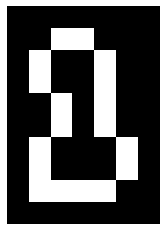

In [3]:
im = """
0000000
0011000
0100100
0100100
0010100
0010100
0100010
0100010
0111100
0000000
"""
im = np.array([int(x) for x in im.replace('\n', '')]).reshape(10, 7).astype(np.uint8)
plt.imshow(im, cmap='gray'), plt.axis('off')

In [4]:
A = im
Ac = 1 - A

(<matplotlib.image.AxesImage at 0x7fbec677a670>, (-0.5, 2.5, 2.5, -0.5))

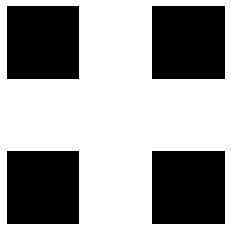

In [5]:
B = np.array([0,1,0,1,1,1,0,1,0]).reshape(3,3).astype(np.uint8)
plt.imshow(B, cmap='gray'), plt.axis('off')

$ X_k = (K_{k-1} \oplus B) \cap A^c $

Text(0.5, 1.0, '$X_8 \\cup A$')

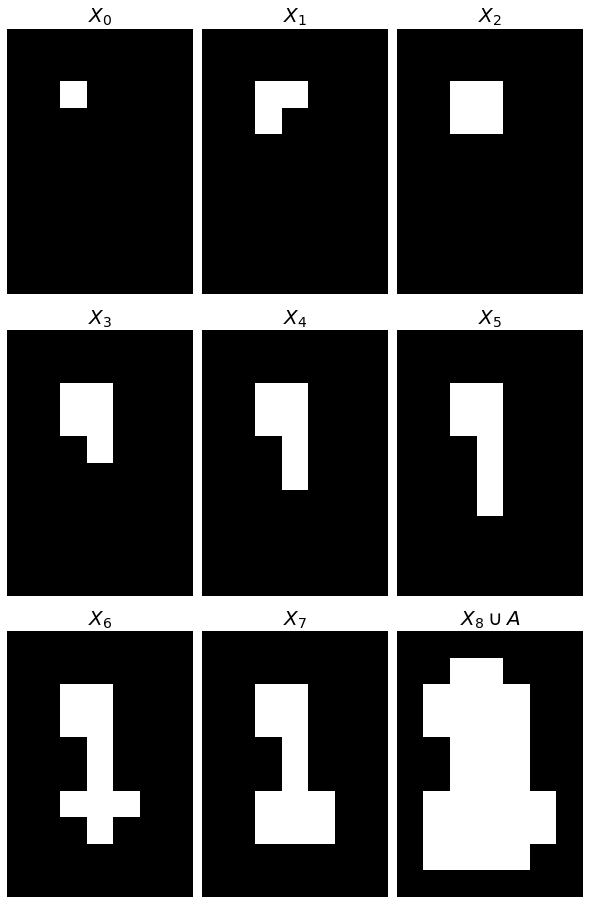

In [22]:
plt.figure(figsize=(8, 13))
plt.gray()
plt.subplots_adjust(left=0, right=1, bottom=0, top=0.95, hspace=0.05, wspace=0.05)

X = np.zeros(A.shape)
X[2, 2] = 1

plt.subplot(3, 3, 1), plt.imshow(X), plt.axis('off')
plt.title(f"$X_0$", size=20)

for i in range(1, 8):
  X = binary_dilation(X, B) & Ac

  plt.subplot(3, 3, i + 1), plt.imshow(X), plt.axis('off')
  plt.title(f"$X_{i}$", size=20)

X = X | A

plt.subplot(3, 3, 9), plt.imshow(X), plt.axis('off')
plt.title(f"$X_8 \cup A$", size=20)